In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




In [ ]:
data=pd.read_csv("student_performance.csv")

In [ ]:
data.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.shape

(1000, 8)

In [ ]:
print(data.columns)
# print(lst)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [ ]:
data=data.rename(columns={
    'race/ethnicity':'race_ethnicity',
    'parental level of education':'parental_level_of_education',
    'test preparation course':'test_preparation_course',
    'math score':'math_score',
    'reading score':'reading_score',
    'writing score':'writing_score'
})

In [ ]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [ ]:
data.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [ ]:
data.dtypes

,0
gender,object
race_ethnicity,object
parental_level_of_education,object
lunch,object
test_preparation_course,object
math_score,int64
reading_score,int64
writing_score,int64


In [ ]:
data['math_score'].fillna(data['math_score'].mean(),inplace=True)

<ipython-input-13-52671f9542cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['math_score'].fillna(data['math_score'].mean(),inplace=True)


checking for outliers

In [ ]:
import seaborn as sns

<Axes: ylabel='writing_score'>

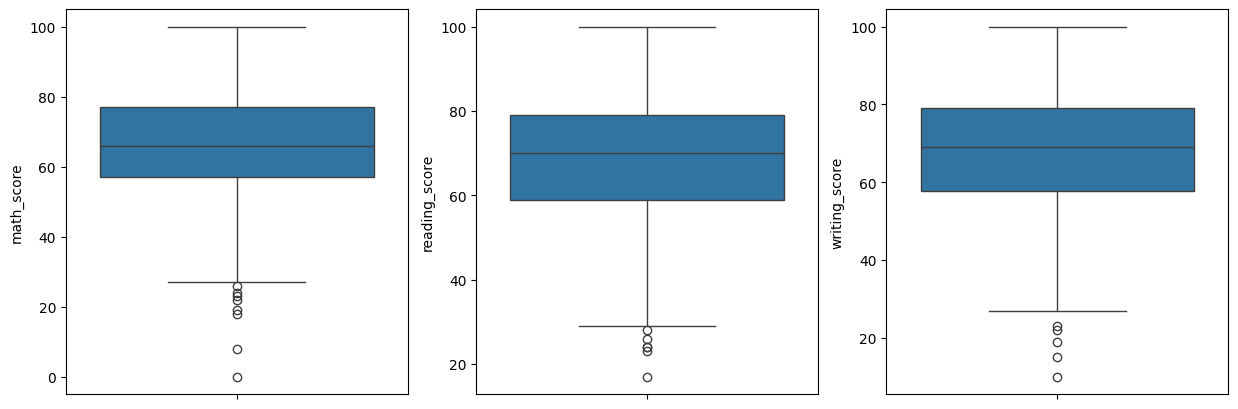

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['math_score'],ax=ax[0])
sns.boxplot(data=data['reading_score'],ax=ax[1])
sns.boxplot(data=data['writing_score'],ax=ax[2])

<Axes: xlabel='writing_score', ylabel='Count'>

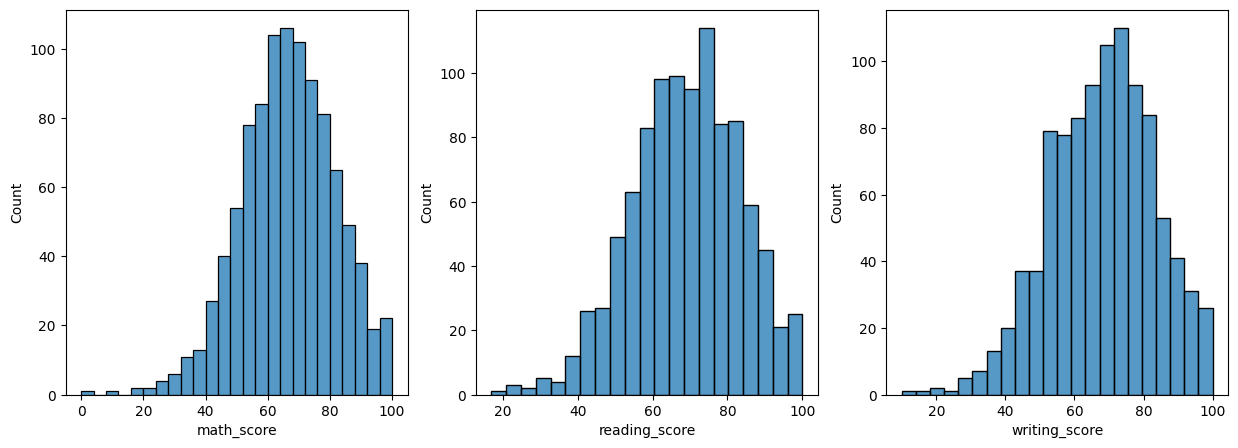

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=data['math_score'],ax=ax[0])
sns.histplot(data=data['reading_score'],ax=ax[1])
sns.histplot(data=data['writing_score'],ax=ax[2])

In [ ]:
def remove_outliers(feature):
  global data
  q3,q1=np.percentile(data[feature],[75,25])
  iqr=q3-q1
  data=data[(data[feature]<=q3+1.5*iqr)&(data[feature]>=q1-1.5*iqr)]

In [ ]:
remove_outliers("math_score")
remove_outliers('reading_score')
remove_outliers('writing_score')

<Axes: ylabel='writing_score'>

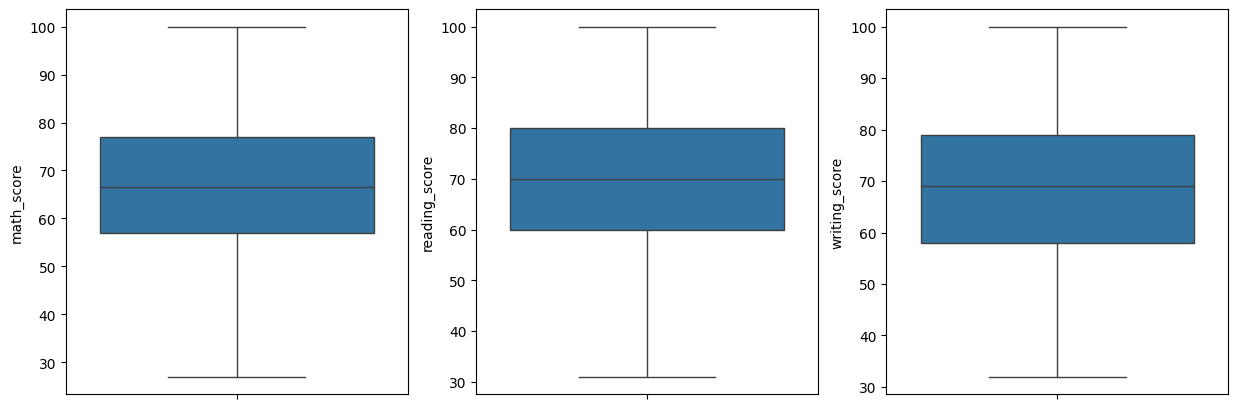

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

sns.boxplot(data=data['math_score'],ax=ax[0])
sns.boxplot(data=data['reading_score'],ax=ax[1])
sns.boxplot(data=data['writing_score'],ax=ax[2])

<Axes: xlabel='writing_score', ylabel='Count'>

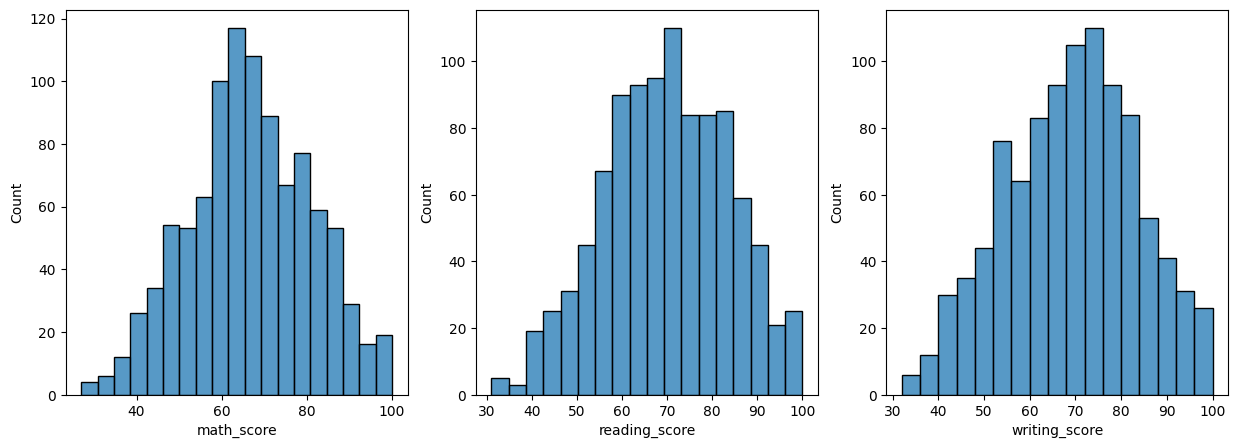

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=data['math_score'],ax=ax[0])
sns.histplot(data=data['reading_score'],ax=ax[1])
sns.histplot(data=data['writing_score'],ax=ax[2])

In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(data.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data['gender']=encoder.fit_transform(data['gender'])
data['parental_level_of_education']=encoder.fit_transform(data['parental_level_of_education'])
data['lunch']=encoder.fit_transform(data['lunch'])
data['test_preparation_course']=encoder.fit_transform(data['test_preparation_course'])
data['race_ethnicity']=encoder.fit_transform(data['race_ethnicity'])

In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


<Axes: xlabel='writing_score', ylabel='Count'>

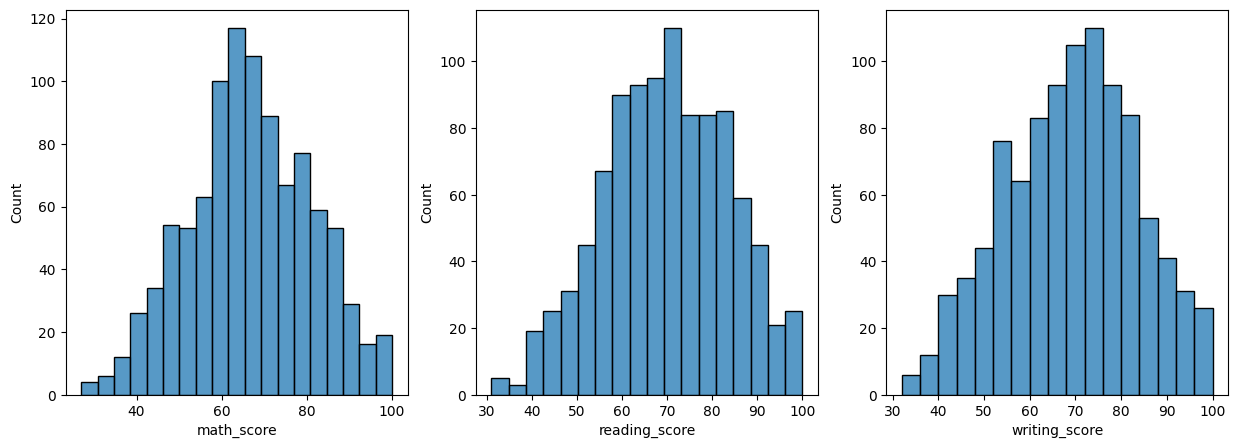

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

sns.histplot(data=data['math_score'],ax=ax[0])
sns.histplot(data=data['reading_score'],ax=ax[1])
sns.histplot(data=data['writing_score'],ax=ax[2])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

data['math_score']=scaler.fit_transform(data[['math_score']])
data['reading_score']=scaler.fit_transform(data[['reading_score']])
data['writing_score']=scaler.fit_transform(data[['writing_score']])



<Axes: xlabel='writing_score', ylabel='Count'>

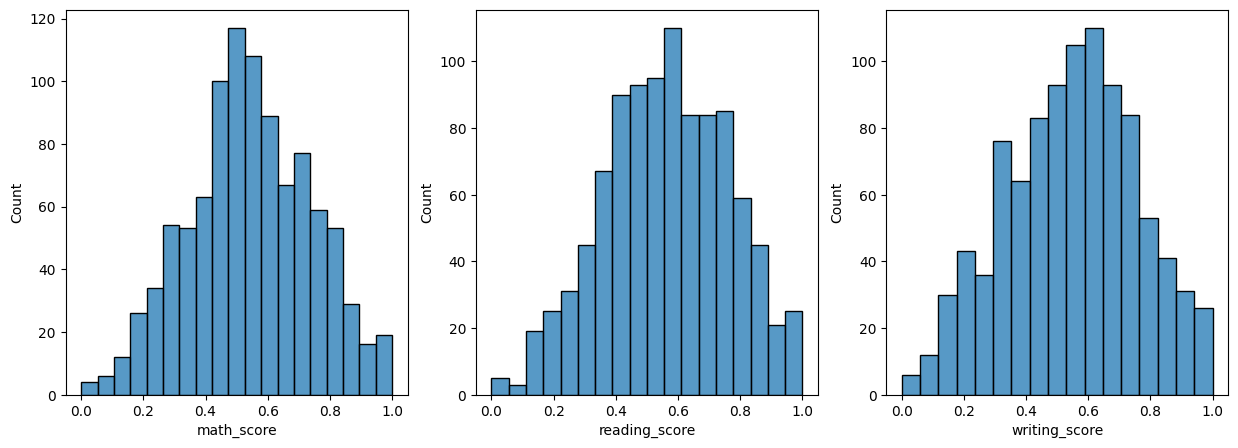

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))

sns.histplot(data=data['math_score'],ax=ax[0])
sns.histplot(data=data['reading_score'],ax=ax[1])
sns.histplot(data=data['writing_score'],ax=ax[2])

In [ ]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,0.616438,0.594203,0.617647
1,0,2,4,1,0,0.575342,0.855072,0.823529
2,0,1,3,1,1,0.863014,0.927536,0.897059
3,1,0,0,0,1,0.273973,0.376812,0.176471
4,1,2,4,1,1,0.671233,0.681159,0.632353
